# FluxRank Clustering

In [43]:
from collections import defaultdict

import numpy as np
import sklearn.mixture
import sklearn.cluster
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from tsdr import tsdr
from tsdr.testseries import sockshop

eps = 0.3818858500163284


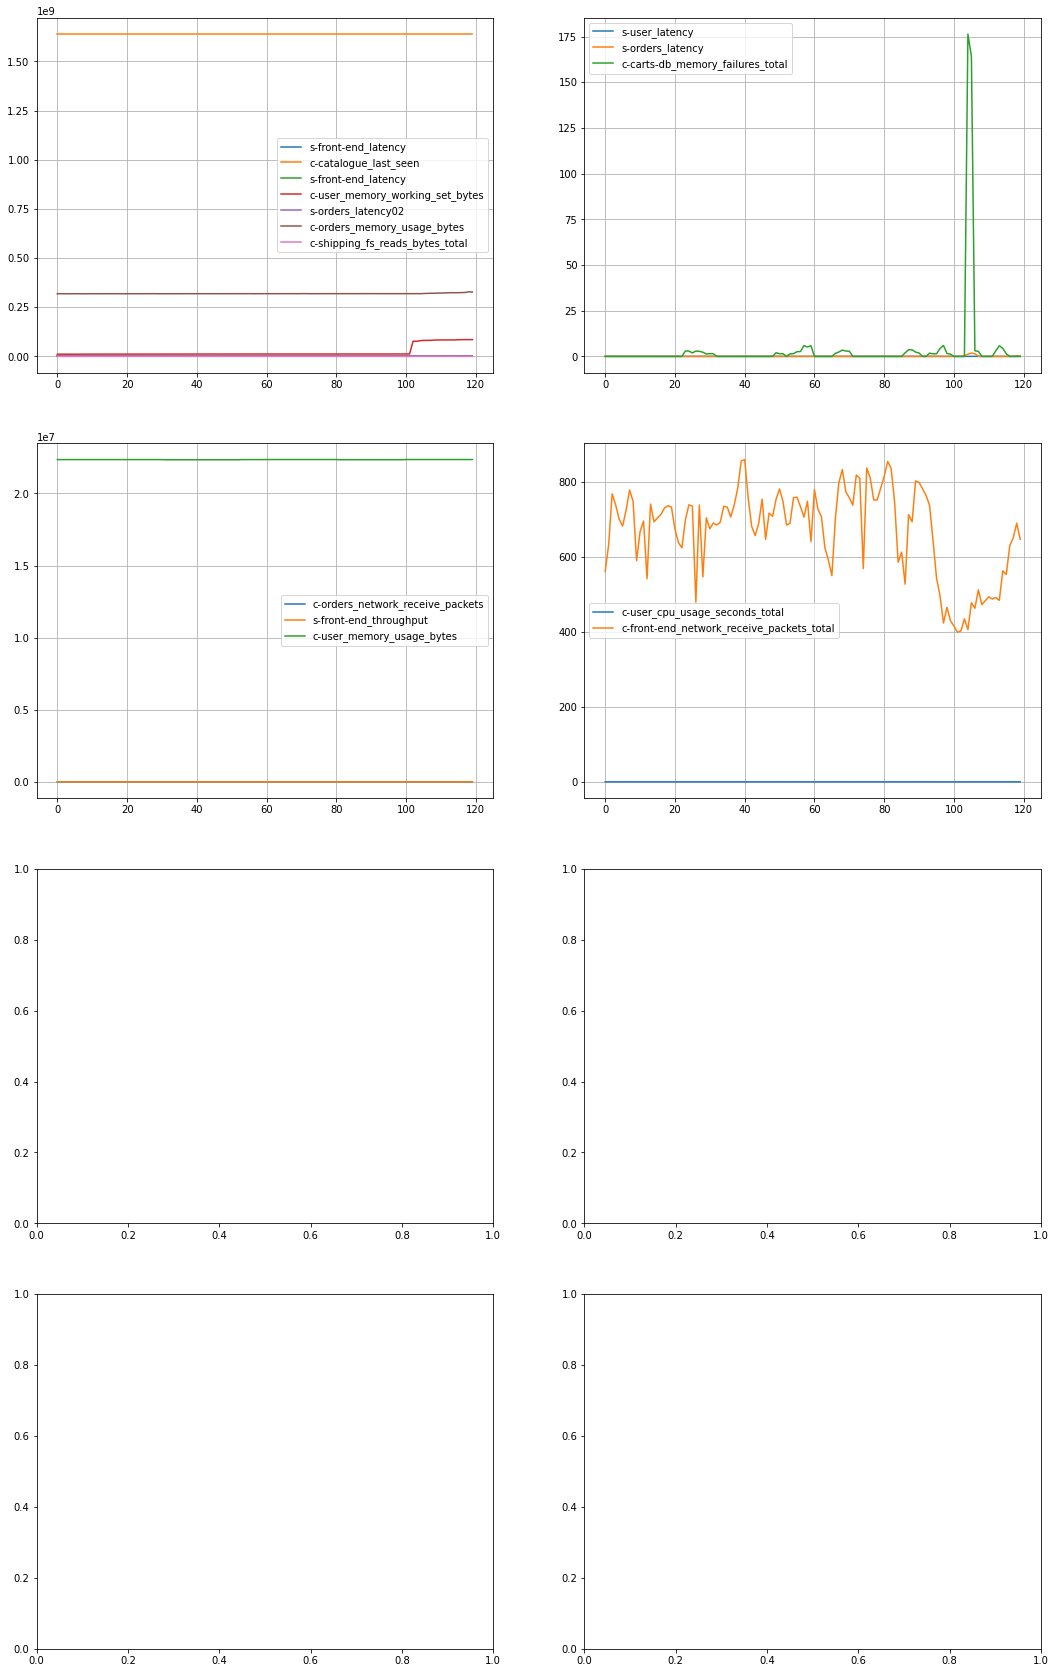

In [64]:
import scipy.stats
from sklearn.neighbors import NearestNeighbors

cases = sockshop.testcases_of_sockshop
ts = np.array([cases[i]['datapoints'] for i in range(len(cases))])

def pearsonr_dist(X, Y, **kwargs):
    r = scipy.stats.pearsonr(X, Y)[0]
    return 1-r

min_pts = 2
nn_fit = NearestNeighbors(n_neighbors=min_pts, metric=pearsonr_dist).fit(ts)
distances, indices = nn_fit.kneighbors()
dist_square_matrix = nn_fit.radius_neighbors_graph(mode='distance', sort_results=True)

eps = max(distances.flatten())/4  # see DBSherlock paper
print(f'eps = {eps}')
print(f'matrix shape = {dist_square_matrix.shape}')

labels = sklearn.cluster.DBSCAN(
    eps=eps, min_samples=min_pts, metric='precomputed',
).fit_predict(dist_square_matrix)

label_to_cases = defaultdict(list)
for i, case in enumerate(cases):
    label_to_cases[labels[i]].append(case)

fig, axs = plt.subplots(len(label_to_cases.keys()), ncols=2)
fig.set_size_inches(18, 2*len(cases))

for cases, ax in zip(label_to_cases.values(), axs.flatten()):
    ax.grid()
    for case in cases:
        ax.plot(case['datapoints'], label=case['name'])
    ax.legend()